In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [2]:
from sklearn.metrics import roc_auc_score

In [3]:
from methods.PAPE import PAPE
from methods.TEST_SET_performance import TEST_SET_performance


In [4]:
from methods.utils import get_chunks

In [6]:
from methods.utils import CB_color_cycle, colors, METRIC_MAPPER

In [11]:
import warnings
warnings.filterwarnings('ignore') #avoid LGBM categorical feature warnings

# READ dataset

In [12]:
# read data and metadata
df = pd.read_parquet('example_dataset/income-2015_2016_2017_2018-CA.pq')

df_reference = df[df['partition']=='reference']
df_production = df[df['partition']=='production']

with open('example_dataset/income-2015_2016_2017_2018-CA_metadata.json') as f:
    metadata = json.load(f)

features = metadata['features_selected']
cat_features = metadata['features_categorical']
cont_features = [x for x in features if x not in cat_features]
    

y_true_column_name = 'y_true'

In [13]:
# monitored model selection
monitored_model_name = 'LGBMClassifier'
monitored_model_y_pred = monitored_model_name + '_y_pred'
monitored_model_y_pred_proba = monitored_model_name + '_y_pred_proba'

In [14]:
metadata

{'data_type': 'real',
 'features_selected': ['AGEP',
  'OCCP',
  'SCHL',
  'MAR',
  'RELP',
  'SEX',
  'RAC1P',
  'POBP',
  'COW',
  'WKHP'],
 'features_categorical': ['OCCP',
  'SCHL',
  'MAR',
  'RELP',
  'SEX',
  'RAC1P',
  'POBP',
  'COW',
  'WKHP'],
 'ml_problem': 'binary_classification',
 'n_rows': 766256,
 'n_cols': 10,
 'partitions': ['train', 'reference', 'production'],
 'missing_values': False,
 'target_desc': "Is a person's income above $50,000?",
 'model_type': 'LGBMClassifier+LogisticRegression+RandomForestClassifier+XGB+FT_Transformer',
 'notes': 'FolkTables Income Problem from 2015_2016_2017_2018 and CA.'}

In [15]:
# metric selection
metric = 'auroc'

In [16]:
# init methods
TEST_SET_perf_estimator = TEST_SET_performance(monitored_model_y_pred_proba, monitored_model_y_pred, y_true_column_name, metric)
PAPE_estimator = PAPE(monitored_model_y_pred_proba, monitored_model_y_pred, y_true_column_name, 
                      cont_features, cat_features, [metric])

In [17]:
# fit methods on reference data

In [18]:
TEST_SET_perf_estimator.fit(df_reference)
PAPE_estimator.fit(df_reference)

In [19]:
# estimate on all chunks

In [20]:
reference_chunks = get_chunks(df_reference)
production_chunks = get_chunks(df_production)

In [21]:
df_reference

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,...,LogisticRegression_y_pred_proba,LGBMClassifier_y_pred,LGBMClassifier_y_pred_proba,RandomForestClassifier_y_pred,RandomForestClassifier_y_pred_proba,XGB_y_pred,XGB_y_pred_proba,FT_Transformer_y_pred,FT_Transformer_y_pred_proba,partition
187475,50.0,1.0,19.0,1.0,4760.0,6.0,0.0,15.0,2.0,9.0,...,0.044200,0,0.040025,0,0.120000,0,0.055995,0,0.040499,reference
187476,49.0,1.0,16.0,1.0,4760.0,6.0,1.0,35.0,1.0,1.0,...,0.199853,0,0.217896,0,0.190000,0,0.137601,0,0.214319,reference
187477,22.0,1.0,18.0,5.0,4760.0,6.0,2.0,12.0,1.0,9.0,...,0.006144,0,0.003666,0,0.000000,0,0.000393,0,0.010222,reference
187478,28.0,1.0,21.0,1.0,1320.0,29.0,0.0,40.0,2.0,1.0,...,0.675260,1,0.791023,0,0.366667,1,0.759199,1,0.906830,reference
187479,31.0,1.0,22.0,1.0,1005.0,6.0,1.0,40.0,1.0,6.0,...,0.705333,1,0.845179,1,0.877500,1,0.860978,1,0.873788,reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377657,54.0,1.0,17.0,1.0,8630.0,48.0,1.0,40.0,1.0,1.0,...,0.562055,1,0.800881,0,0.410000,1,0.534396,1,0.846707,reference
377658,20.0,1.0,19.0,5.0,4760.0,6.0,2.0,10.0,2.0,1.0,...,0.003006,0,0.001572,0,0.000000,0,0.000253,0,0.007631,reference
377659,62.0,1.0,16.0,1.0,7315.0,312.0,0.0,40.0,1.0,1.0,...,0.447126,0,0.322704,0,0.180000,0,0.247527,0,0.474693,reference
377660,47.0,1.0,19.0,1.0,5700.0,6.0,0.0,40.0,2.0,1.0,...,0.390953,0,0.446802,0,0.030000,0,0.482011,0,0.467588,reference


In [22]:
res_reference = pd.DataFrame()
res_production = pd.DataFrame()

In [23]:
%%time
# estimates on reference chunks
realized_performance = []
test_set_estimates = []
pape_estimates = []
for chunk in reference_chunks:
    test_set_estimates.append(TEST_SET_perf_estimator.estimate(chunk))
    realized_performance.append(roc_auc_score(chunk[y_true_column_name], chunk[monitored_model_y_pred_proba]))
    pape_estimates.append(PAPE_estimator.estimate(chunk)[0])
    
res_reference['realized_auroc'] = realized_performance
res_reference['TEST_SET'] = test_set_estimates
res_reference['PAPE'] = pape_estimates

res_reference['partition'] = 'reference'

CPU times: total: 20min 54s
Wall time: 1min 32s


In [24]:
%%time
# estimates on production chunks
realized_performance = []
test_set_estimates = []
pape_estimates = []
for chunk in production_chunks:
    test_set_estimates.append(TEST_SET_perf_estimator.estimate(chunk))
    realized_performance.append(roc_auc_score(chunk[y_true_column_name], chunk[monitored_model_y_pred_proba]))
    pape_estimates.append(PAPE_estimator.estimate(chunk)[0])
    
res_production['realized_auroc'] = realized_performance
res_production['TEST_SET'] = test_set_estimates
res_production['PAPE'] = pape_estimates

res_production['partition'] = 'production'

CPU times: total: 44min 55s
Wall time: 3min 22s


In [25]:
results = pd.concat([res_reference, res_production]).reset_index(drop=True)

In [26]:
results

,realized_auroc,TEST_SET,PAPE,partition
0,0.918917,0.908728,0.910287,reference
1,0.909925,0.908728,0.914044,reference
2,0.910228,0.908728,0.907561,reference
3,0.912984,0.908728,0.910371,reference
4,0.899866,0.908728,0.909084,reference
...,...,...,...,...
284,0.893996,0.908728,0.894712,production
285,0.874222,0.908728,0.881448,production
286,0.884643,0.908728,0.887664,production
287,0.896031,0.908728,0.886420,production


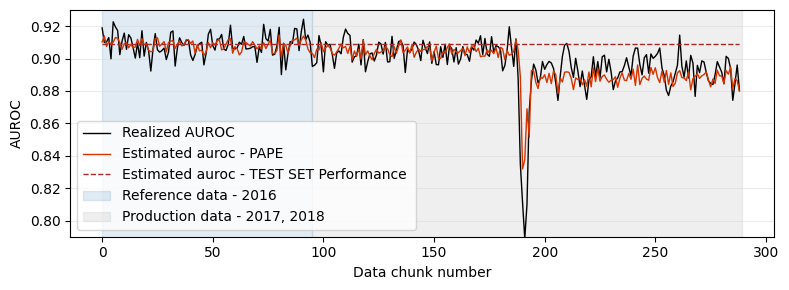

In [28]:
fill_y = [0.75,1]
show_methods = ['TEST_SET', 'PAPE']

# plt.figure(figsize=(14,6))
plt.figure(figsize=(8,3))
plt.plot(results['realized_auroc'], label='Realized AUROC', color='black', linewidth=1)
plt.plot(results['PAPE'], label='Estimated auroc - PAPE ' , color = colors['PAPE'], linewidth=1)
plt.plot(results['TEST_SET'], '--',label='Estimated auroc - TEST SET Performance ', color = colors['TEST_SET'], linewidth=1)

plt.xlabel("Data chunk number")
plt.ylabel('AUROC')
plt.fill_betweenx(fill_y, 0, len(reference_chunks), color='#377eb8', alpha=0.15, label='Reference data - 2016')
plt.fill_betweenx(fill_y, len(reference_chunks), len(results), color='#999999', alpha=0.15, label='Production data - 2017, 2018')


plt.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
plt.ylim(0.79, .93)
plt.tight_layout()
plt.legend()

